# Python for Fantasy Football - Matchup Adjustment

In [1]:
import pandas as pd

# Load data
xg_data = pd.read_csv('D:/Tom/Downloads/epl_xg.csv')

# Add columns again for goal difference, expected goal difference and non-penalty expected goal difference
# Alternatively, you can save the dataframe we made in part 1 using the code xg_data.to_csv('D:/Tom/Downloads/xg_data_inc_gd.csv'), and then load that csv here instead
xg_data['GD'] = xg_data['G'] - xg_data['GA']
xg_data['xGD'] = xg_data['xG'] - xg_data['xGA']
xg_data['NPxGD'] = xg_data['NPxG'] - xg_data['NPxGA']
xg_data

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA,GD,xGD,NPxGD
0,Arsenal,8,19,10,10.41,10.95,10.41,10.95,9,-0.54,-0.54
1,Bournemouth,8,16,12,16.08,9.25,12.27,7.73,4,6.83,4.54
2,Brighton,8,9,13,9.49,14.71,6.44,12.43,-4,-5.22,-5.99
3,Burnley,8,10,12,7.69,14.11,7.69,13.35,-2,-6.42,-5.66
4,Cardiff,8,4,17,7.44,13.68,7.44,11.40,-13,-6.24,-3.96
5,Chelsea,8,18,5,15.72,8.59,13.44,8.59,13,7.13,4.85
6,Crystal Palace,8,5,9,7.02,11.56,7.02,9.28,-4,-4.54,-2.26
7,Everton,8,13,12,9.52,9.76,8.76,9.00,1,-0.24,-0.24
8,Fulham,8,9,21,9.41,18.00,9.41,15.71,-12,-8.59,-6.30
9,Huddersfield,8,4,17,4.75,13.26,4.75,11.74,-13,-8.51,-6.99


## String formatting
To enable us to carry out further analysis, it would be great to have per game versions of each stat as well as the totals. We could do this one by one like we did with the goal difference columns, but there is a better way! If you managed to take the free introductory course on DataCamp I recommended in part 1 then you might already know about string formatting, but if not take a look at the code below and see if you can figure out what it's doing:

In [136]:
name = 'Tom'
print('My name is %s' % name)

age = 28
print('My name is %s and I am %d' % (name, age))

My name is Tom
My name is Tom and I am 28


The string formatting operator, %, allows you to easily pass variables to a string. You can see from the examples above that '%s' will insert a string in that location, whereas '%d' will insert an integer - for a complete list of the other symbols that can be used with % see https://www.tutorialspoint.com/python/python_strings.htm. We can use this trick to quickly generate the new column names for our per game stats. It's always worth keeping in mind that if you have to repeat the same or similar code more than once, there is likely a quicker way to do things! First, we need to get a list of the column names we are interested in, then we can iterate over that list and generate a new column each time:

In [137]:
# Print a list of the columns in the dataframe

print(list(xg_data))

['Team', 'Games', 'G', 'GA', 'xG', 'xGA', 'NPxG', 'NPxGA', 'GD', 'xGD', 'NPxGD']


In [138]:
# Create a list of the columns we want
# We could have done this programmatically by removing the unwanted columns from the list above, but in this case it's just as easy to copy and paste!
cols = ['G', 'GA', 'xG', 'xGA', 'NPxG', 'NPxGA', 'GD', 'xGD', 'NPxGD']

# Create new columns for per game versions of each stat in the cols list
# This code iterates through the list and adds new columns for each item in the list, using string formatting to create the column names
# i.e. for each column in the cols list, create a new column where col name = original col name + '_pg' and col value = original column value / games
for col in cols:
    xg_data['%s_pg' % col] = xg_data[col] / xg_data['Games']

xg_data

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA,GD,xGD,NPxGD,G_pg,GA_pg,xG_pg,xGA_pg,NPxG_pg,NPxGA_pg,GD_pg,xGD_pg,NPxGD_pg
0,Arsenal,8,19,10,10.41,10.95,10.41,10.95,9,-0.54,-0.54,2.38,1.25,1.30,1.37,1.30,1.37,1.12,-0.07,-0.07
1,Bournemouth,8,16,12,16.08,9.25,12.27,7.73,4,6.83,4.54,2.00,1.50,2.01,1.16,1.53,0.97,0.50,0.85,0.57
2,Brighton,8,9,13,9.49,14.71,6.44,12.43,-4,-5.22,-5.99,1.12,1.62,1.19,1.84,0.81,1.55,-0.50,-0.65,-0.75
3,Burnley,8,10,12,7.69,14.11,7.69,13.35,-2,-6.42,-5.66,1.25,1.50,0.96,1.76,0.96,1.67,-0.25,-0.80,-0.71
4,Cardiff,8,4,17,7.44,13.68,7.44,11.40,-13,-6.24,-3.96,0.50,2.12,0.93,1.71,0.93,1.43,-1.62,-0.78,-0.49
5,Chelsea,8,18,5,15.72,8.59,13.44,8.59,13,7.13,4.85,2.25,0.62,1.97,1.07,1.68,1.07,1.62,0.89,0.61
6,Crystal Palace,8,5,9,7.02,11.56,7.02,9.28,-4,-4.54,-2.26,0.62,1.12,0.88,1.45,0.88,1.16,-0.50,-0.57,-0.28
7,Everton,8,13,12,9.52,9.76,8.76,9.00,1,-0.24,-0.24,1.62,1.50,1.19,1.22,1.09,1.12,0.12,-0.03,-0.03
8,Fulham,8,9,21,9.41,18.00,9.41,15.71,-12,-8.59,-6.30,1.12,2.62,1.18,2.25,1.18,1.96,-1.50,-1.07,-0.79
9,Huddersfield,8,4,17,4.75,13.26,4.75,11.74,-13,-8.51,-6.99,0.50,2.12,0.59,1.66,0.59,1.47,-1.62,-1.06,-0.87


Just in case you weren't 100% sure that using Python is worthwhile, hopefully that short bit of code will convince you! This confirms what we knew already - Arsenal are scoring an extra goal per game right now, which is unsustainable even if you account for some modelling error.

Now we can get onto the main subject of this article, which is how to project stats for upcoming fixtures. In this case we will try to predict the average goals we can expect for each team in week 9 of the EPL season using xG_pg and xGA_pg. Obviously we only have an 8 game sample here so it's hard to fully trust the results, but you will be able to use this method for any stats you want (shots, crosses etc). First, we need to get the upcoming fixtures, and to make things easier there is a csv file provided on GitHub.

In [139]:
# Load fixtures
fixtures = pd.read_csv('D:/Tom/Downloads/epl_fixtures.csv')
fixtures

,Home_Team,Away_Team
0,Chelsea,Manchester United
1,Bournemouth,Southampton
2,Cardiff,Fulham
3,Manchester City,Burnley
4,Newcastle,Brighton
5,West Ham,Tottenham
6,Wolves,Watford
7,Huddersfield,Liverpool
8,Everton,Crystal Palace
9,Arsenal,Leicester


## Cleaning data
Unfortunately in this data we have 'Wolves' instead of 'Wolverhampton Wanderers', a common problem if your data comes from multiple sources. Luckily it's easy to solve in this case:

In [140]:
# Replace 'Wolves' with 'Wolverhampton Wanderers'
# Note that you can look in a specific column or row if you don't want to replace values in the entire dataframe
fixtures = fixtures.replace('Wolves', 'Wolverhampton Wanderers')
fixtures

,Home_Team,Away_Team
0,Chelsea,Manchester United
1,Bournemouth,Southampton
2,Cardiff,Fulham
3,Manchester City,Burnley
4,Newcastle,Brighton
5,West Ham,Tottenham
6,Wolverhampton Wanderers,Watford
7,Huddersfield,Liverpool
8,Everton,Crystal Palace
9,Arsenal,Leicester


## Merging dataframes
In my book, 'Daily Fantasy Football: The Complete Guide on How to Play and Win Real Money', I mentioned a quick method that you can use to adjust stats for matchups. The first step is to add xG_pg and xGA_pg to the fixtures dataframe. We can combine the fixtures and xg_data dataframes using the pandas merge operation, which works in a similar way to Excel's VLOOKUP function:

In [141]:
# Filter xg_data to only include the columns we want
xg_data_pg = xg_data[['Team', 'xG_pg', 'xGA_pg']]

# Merge fixtures and xg_data_pg (see https://pandas.pydata.org/pandas-docs/stable/merging.html for more info on combining pandas dataframes)
# This will get home team stats by matching the 'Home_Team' column with the 'Team' column using left_on and right_on
fixtures = pd.merge(fixtures, xg_data_pg, left_on='Home_Team', right_on='Team')
fixtures

,Home_Team,Away_Team,Team,xG_pg,xGA_pg
0,Chelsea,Manchester United,Chelsea,1.97,1.07
1,Bournemouth,Southampton,Bournemouth,2.01,1.16
2,Cardiff,Fulham,Cardiff,0.93,1.71
3,Manchester City,Burnley,Manchester City,2.81,0.50
4,Newcastle,Brighton,Newcastle,0.75,1.61
5,West Ham,Tottenham,West Ham,1.09,1.67
6,Wolverhampton Wanderers,Watford,Wolverhampton Wanderers,1.38,0.77
7,Huddersfield,Liverpool,Huddersfield,0.59,1.66
8,Everton,Crystal Palace,Everton,1.19,1.22
9,Arsenal,Leicester,Arsenal,1.30,1.37


In [142]:
# We can repeat to get the away team stats
fixtures = pd.merge(fixtures, xg_data_pg, left_on='Away_Team', right_on='Team')
fixtures

,Home_Team,Away_Team,Team_x,xG_pg_x,xGA_pg_x,Team_y,xG_pg_y,xGA_pg_y
0,Chelsea,Manchester United,Chelsea,1.97,1.07,Manchester United,1.60,1.37
1,Bournemouth,Southampton,Bournemouth,2.01,1.16,Southampton,1.33,1.75
2,Cardiff,Fulham,Cardiff,0.93,1.71,Fulham,1.18,2.25
3,Manchester City,Burnley,Manchester City,2.81,0.50,Burnley,0.96,1.76
4,Newcastle,Brighton,Newcastle,0.75,1.61,Brighton,1.19,1.84
5,West Ham,Tottenham,West Ham,1.09,1.67,Tottenham,1.85,1.21
6,Wolverhampton Wanderers,Watford,Wolverhampton Wanderers,1.38,0.77,Watford,1.32,1.38
7,Huddersfield,Liverpool,Huddersfield,0.59,1.66,Liverpool,2.08,0.74
8,Everton,Crystal Palace,Everton,1.19,1.22,Crystal Palace,0.88,1.45
9,Arsenal,Leicester,Arsenal,1.30,1.37,Leicester,1.14,1.07


## Removing and renaming dataframe columns
Whilst combining dataframes is a very useful tool in a lot of situations, in this case we have to remove the unwanted 'Team_x' and 'Team_y' columns and rename the others to avoid confusion:

In [143]:
# Remove unwanted columns
# By default, the axis argument is set to 0, which refers to rows
# In this case we want to drop columns, so we need to specify axis=1
fixtures = fixtures.drop(['Team_x', 'Team_y'], axis=1)
fixtures

,Home_Team,Away_Team,xG_pg_x,xGA_pg_x,xG_pg_y,xGA_pg_y
0,Chelsea,Manchester United,1.97,1.07,1.60,1.37
1,Bournemouth,Southampton,2.01,1.16,1.33,1.75
2,Cardiff,Fulham,0.93,1.71,1.18,2.25
3,Manchester City,Burnley,2.81,0.50,0.96,1.76
4,Newcastle,Brighton,0.75,1.61,1.19,1.84
5,West Ham,Tottenham,1.09,1.67,1.85,1.21
6,Wolverhampton Wanderers,Watford,1.38,0.77,1.32,1.38
7,Huddersfield,Liverpool,0.59,1.66,2.08,0.74
8,Everton,Crystal Palace,1.19,1.22,0.88,1.45
9,Arsenal,Leicester,1.30,1.37,1.14,1.07


In [144]:
# We have already seen that a list in Python is represented using square brackets []
# Curly brackets {} are used for dictionaries
# In a dictionary, the item on the left of the colon is the key, whilst the item on the right is the value
# We can use a dictionary to rename the columns in the fixtures dataframe
# This code will look for the dictionary keys in the column names, and replace them with the dictionary values
fixtures = fixtures.rename(columns={'xG_pg_x': 'xG_pg_home_team', 'xGA_pg_x': 'xGA_pg_home_team', 'xG_pg_y': 'xG_pg_away_team', 'xGA_pg_y': 'xGA_pg_away_team'})
fixtures

# Note that we could have assigned the dictionary to a variable instead:
# colnames = {'xG_pg_x': 'xG_pg_home', 'xGA_pg_x': 'xGA_pg_home', 'xG_pg_y': 'xG_pg_away', 'xGA_pg_y': 'xGA_pg_away'}
# fixtures = fixtures.rename(columns=colnames)

,Home_Team,Away_Team,xG_pg_home_team,xGA_pg_home_team,xG_pg_away_team,xGA_pg_away_team
0,Chelsea,Manchester United,1.97,1.07,1.60,1.37
1,Bournemouth,Southampton,2.01,1.16,1.33,1.75
2,Cardiff,Fulham,0.93,1.71,1.18,2.25
3,Manchester City,Burnley,2.81,0.50,0.96,1.76
4,Newcastle,Brighton,0.75,1.61,1.19,1.84
5,West Ham,Tottenham,1.09,1.67,1.85,1.21
6,Wolverhampton Wanderers,Watford,1.38,0.77,1.32,1.38
7,Huddersfield,Liverpool,0.59,1.66,2.08,0.74
8,Everton,Crystal Palace,1.19,1.22,0.88,1.45
9,Arsenal,Leicester,1.30,1.37,1.14,1.07


## The map function
The other option is to use the map function to add the values from xg_data to fixture. Let's load the fixtures csv again so that we can try this method instead:

In [145]:
# Load fixtures data again and assign to a new variable, fixtures2
fixtures2 = pd.read_csv('D:/Tom/Downloads/epl_fixtures.csv')
fixtures2 = fixtures2.replace('Wolves', 'Wolverhampton Wanderers')

# First, set the 'Team' column of xg_data_pg to be the dataframe index
xg_data_pg.set_index('Team', inplace=True)
xg_data_pg

# inplace=True tells Python to complete the operation in place, avoiding the need to assign it back to a variable
# Alternatively we could have used the following code:
# xg_data_pg = xg_data_pg.set_index('Team')

,xG_pg,xGA_pg
Team,,
Arsenal,1.30,1.37
Bournemouth,2.01,1.16
Brighton,1.19,1.84
Burnley,0.96,1.76
Cardiff,0.93,1.71
Chelsea,1.97,1.07
Crystal Palace,0.88,1.45
Everton,1.19,1.22
Fulham,1.18,2.25


In [146]:
# Now we can use map to look for the values in a column from fixtures2 and get the corresponding value from xg_data_pg
# The code below looks for each 'Home_Team' in fixtures2 in the index of xg_data_pg, and maps the corresponding xG_pg back to fixtures2
fixtures2['xG_pg_home_team'] = fixtures2['Home_Team'].map(xg_data_pg['xG_pg'])

# We can repeat to get all the stats we want (of course there is a quicker way, but in this case there are only a few columns so it's not too bad to go one by one)
fixtures2['xGA_pg_home_team'] = fixtures2['Home_Team'].map(xg_data_pg['xGA_pg'])
fixtures2['xG_pg_away_team'] = fixtures2['Away_Team'].map(xg_data_pg['xG_pg'])
fixtures2['xGA_pg_away_team'] = fixtures2['Away_Team'].map(xg_data_pg['xGA_pg'])
fixtures2

,Home_Team,Away_Team,xG_pg_home_team,xGA_pg_home_team,xG_pg_away_team,xGA_pg_away_team
0,Chelsea,Manchester United,1.97,1.07,1.60,1.37
1,Bournemouth,Southampton,2.01,1.16,1.33,1.75
2,Cardiff,Fulham,0.93,1.71,1.18,2.25
3,Manchester City,Burnley,2.81,0.50,0.96,1.76
4,Newcastle,Brighton,0.75,1.61,1.19,1.84
5,West Ham,Tottenham,1.09,1.67,1.85,1.21
6,Wolverhampton Wanderers,Watford,1.38,0.77,1.32,1.38
7,Huddersfield,Liverpool,0.59,1.66,2.08,0.74
8,Everton,Crystal Palace,1.19,1.22,0.88,1.45
9,Arsenal,Leicester,1.30,1.37,1.14,1.07


In this case using map is probably easier, but it often won't be - for instance if we already had matching column names in the dataframes we were combining.

## Generating projected stats
Now we have the data we want, we can use the simple method from my book to adjust the xG numbers. Just in case you didn't read the book, the method we want is as follows:
adjusted stat = (offense * defense) / league average

In [165]:
# Work out the average xGA_pg
xG_avg = xg_data_pg['xG_pg'].mean()

# Copy fixtures2 to a new dataframe called matchups (you could just add the new columns directly to fixtures2 if you wanted)
matchups = fixtures2.copy()

# Add new columns for adjusted xG for home and away team
matchups['xG_adjusted_home_team'] = (matchups['xG_pg_home_team'] * matchups['xGA_pg_away_team']) / xGA_avg
matchups['xG_adjusted_away_team'] = (matchups['xG_pg_away_team'] * matchups['xGA_pg_home_team']) / xGA_avg
matchups

,Home_Team,Away_Team,xG_pg_home_team,xGA_pg_home_team,xG_pg_away_team,xGA_pg_away_team,xG_adjusted_home_team,xG_adjusted_away_team
0,Chelsea,Manchester United,1.97,1.07,1.60,1.37,1.96,1.25
1,Bournemouth,Southampton,2.01,1.16,1.33,1.75,2.56,1.11
2,Cardiff,Fulham,0.93,1.71,1.18,2.25,1.52,1.46
3,Manchester City,Burnley,2.81,0.50,0.96,1.76,3.60,0.35
4,Newcastle,Brighton,0.75,1.61,1.19,1.84,1.00,1.38
5,West Ham,Tottenham,1.09,1.67,1.85,1.21,0.96,2.24
6,Wolverhampton Wanderers,Watford,1.38,0.77,1.32,1.38,1.38,0.74
7,Huddersfield,Liverpool,0.59,1.66,2.08,0.74,0.32,2.51
8,Everton,Crystal Palace,1.19,1.22,0.88,1.45,1.25,0.78
9,Arsenal,Leicester,1.30,1.37,1.14,1.07,1.01,1.14


Ideally to make these numbers more useful, you will want to also factor in home advantage. Some teams will have a bigger home advantage than others due to various factors (e.g. level of support, different tactics of team or opponent etc), so if we had a larger sample our best option would be to use xG_pg at home or away rather than overall xG_pg. For now, a quick way to do this is to take the difference in average goals scored at home vs all matches. Since 14/15 teams have scored 1.1x more goals at home, with away teams scoring 0.87x as many goals.

In [166]:
# Account for home advantage
matchups['xG_adjusted_home_team'] = matchups['xG_adjusted_home_team'] * 1.1
matchups['xG_adjusted_away_team'] = matchups['xG_adjusted_away_team'] * 0.87
matchups

,Home_Team,Away_Team,xG_pg_home_team,xGA_pg_home_team,xG_pg_away_team,xGA_pg_away_team,xG_adjusted_home_team,xG_adjusted_away_team
0,Chelsea,Manchester United,1.97,1.07,1.60,1.37,2.15,1.09
1,Bournemouth,Southampton,2.01,1.16,1.33,1.75,2.81,0.97
2,Cardiff,Fulham,0.93,1.71,1.18,2.25,1.67,1.27
3,Manchester City,Burnley,2.81,0.50,0.96,1.76,3.96,0.30
4,Newcastle,Brighton,0.75,1.61,1.19,1.84,1.10,1.20
5,West Ham,Tottenham,1.09,1.67,1.85,1.21,1.05,1.94
6,Wolverhampton Wanderers,Watford,1.38,0.77,1.32,1.38,1.52,0.64
7,Huddersfield,Liverpool,0.59,1.66,2.08,0.74,0.35,2.18
8,Everton,Crystal Palace,1.19,1.22,0.88,1.45,1.37,0.68
9,Arsenal,Leicester,1.30,1.37,1.14,1.07,1.11,0.99


## Sense checking values
To check whether these numbers are realistic, let's compare them to the actual implied goal odds set by the bookies. I've already done the hard work of providing these in another csv. Note that I am writing this quite far ahead of the week 9 fixtures, so at least in theory these numbers will get more accurate as we move closer to kickoff, but they shouldn't be too far off.

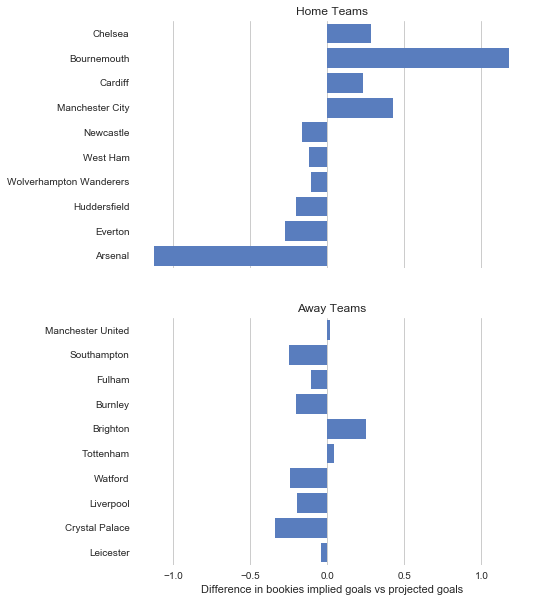

In [167]:
# Load bookies implied goal totals
bookies = pd.read_csv('D:/Tom/Downloads/epl_week_9_implied_goals.csv')

# Merge with matchups (here merging works well because we have the Home_Team and Away_Team columns in both dataframes)
matchups = pd.merge(matchups, bookies)

# Calculate difference in goal totals
matchups['home_goals_diff'] = matchups['xG_adjusted_home_team'] - matchups['Bookies_Home_Goals']
matchups['away_goals_diff'] = matchups['xG_adjusted_away_team'] - matchups['Bookies_Away_Goals']

# Plot the results using the code from part 1
from matplotlib import pyplot as plt
import seaborn as sns

# Set the plot style and colour palette to use
sns.set(style='whitegrid')
sns.set_color_codes('muted')

# Initialize the matplotlib figure (f) and axes (ax), and set width and height of the plot
# In this case we want two plots, one each for home and away teams
# We can plot these on top of each other and use a shared x axis by calling nrows=2 and sharex=True
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 10), sharex=True)

# Create the plots, choosing the axes, the variables for each axis, the data source and the colour
sns.barplot(x='home_goals_diff', y='Home_Team', data=matchups, color='b', ax=ax1)
sns.barplot(x='away_goals_diff', y='Away_Team', data=matchups, color='b', ax=ax2)

# Rename the axes, setting y axis label to be blank
ax1.set(xlabel='', ylabel='', title='Home Teams')
ax2.set(xlabel='Difference in bookies implied goals vs our projected goals', ylabel='', title='Away Teams')

# Remove the borders from the plot
sns.despine(left=True, bottom=True)

Generally our projected numbers don't look that bad despite using a pretty basic method, with the big differences being Arsenal (unsustainable goalscoring) and Bournemouth (different style to last season). It's highly likely that the bookies are using a larger sample of data than us (amongst other things), as well as adjusting a bit for how much action they expect from the public on each team. If you don't think it's realistic to expect Manchester City to score over 3.5 goals on average at home to Burnley, think again!

## Creating functions
The final step in this part is to create a function to calculate the win and clean sheet odds for each team using our average projected goal numbers. We could do this without a function, but by wrapping our code inside a function we can use it again and again without having to re-type the same lines more than once. There is almost certainly a better way to achieve the same results than the code I have written here, so if you like feel free to play around and see if you can come up with an alternative! If you aren't sure what a part of the code is doing, try to run those lines separately, or add print statements inside the function to help explain.

In [198]:
# Import the numpy module (package designed for scientific computing)
import numpy as np

# Define a function to calculate win and clean sheet percentages based on average goal totals for each team
# The general format is
# def function_name(function_inputs):
#     do things
#     return result
# It's always a good idea to include a 'docstring' in your function, which is a description of how to use the function surrounded by triple quotes
def win_cs(df, home_goals_col, away_goals_col, n=10000):
    """Generates win and clean sheet percentages for each row of a dataframe, df, by using average goal totals from home_goals_col and away_goals_col
    n = number of sims to run, set at 10000 by default"""
    
    # Create blank lists for wins and clean sheets
    home_win_list = []
    away_win_list = []
    home_cs_list = []
    away_cs_list = []
    
    # Iterate through each row (i) in the dataframe
    for i in range(len(df)):
        # Get home and away projected goals for that row
        avg_home_goals = df.iloc[i][home_goals_col]
        avg_away_goals = df.iloc[i][away_goals_col]

        # Simulate home and away goals by drawing from a random poisson distribution n times
        home_goals_sim = np.random.poisson(avg_home_goals, n)
        away_goals_sim = np.random.poisson(avg_away_goals, n)

        # Create a new dataframe, sim, with the columns as the results
        sim = pd.DataFrame({'home_score': home_goals_sim, 'away_score': away_goals_sim})

        # Add new columns by using np.where() to evaluate conditional expressions, setting 1 for true and 0 for false
        sim['home_win'] = np.where(sim['home_score'] > sim['away_score'], 1, 0)
        sim['away_win'] = np.where(sim['away_score'] > sim['home_score'], 1, 0)
        sim['home_clean_sheet'] = np.where(sim['away_score'] == 0, 1, 0)
        sim['away_clean_sheet'] = np.where(sim['home_score'] == 0, 1, 0)

        # Sum the number of each result and divide by total number of sims to get percentages
        # Append the result to the corresponding list each time
        # As we iterate through the dataframe the win and clean sheet percentages for each row will be added to the end of the lists, until eventually we have values for each row
        home_win_list.append(sim['home_win'].sum() / n)
        away_win_list.append(sim['away_win'].sum() / n)
        home_cs_list.append(sim['home_clean_sheet'].sum() / n)
        away_cs_list.append(sim['away_clean_sheet'].sum() / n)
        
    # Add new columns to the input dataframe from the lists containing win and clean sheet percentages
    df['home_win'] = np.asarray(home_win_list)
    df['away_win'] = np.asarray(away_win_list)
    df['home_clean_sheet'] = np.asarray(home_cs_list)
    df['away_clean_sheet'] = np.asarray(away_cs_list)
    
    return df

# Run our new function, specifying the paramaters we want as inputs
# Note that because we set n=10000 when we defined the function, we don't need to set a value of n here
matchups = win_cs(df=matchups, home_goals_col='xG_adjusted_home_team', away_goals_col='xG_adjusted_away_team')

# Check the results (note how you can re-order the columns)
displaycols = ['Home_Team', 'xG_adjusted_home_team', 'home_win', 'home_clean_sheet',
               'Away_Team', 'xG_adjusted_away_team', 'away_win', 'away_clean_sheet']
matchups[displaycols]

,Home_Team,xG_adjusted_home_team,home_win,home_clean_sheet,Away_Team,xG_adjusted_away_team,away_win,away_clean_sheet
0,Chelsea,2.15,0.61,0.33,Manchester United,1.09,0.19,0.11
1,Bournemouth,2.81,0.75,0.38,Southampton,0.97,0.10,0.06
2,Cardiff,1.67,0.47,0.28,Fulham,1.27,0.29,0.19
3,Manchester City,3.96,0.95,0.74,Burnley,0.30,0.01,0.02
4,Newcastle,1.10,0.33,0.30,Brighton,1.20,0.39,0.33
5,West Ham,1.05,0.20,0.14,Tottenham,1.94,0.57,0.34
6,Wolverhampton Wanderers,1.52,0.58,0.52,Watford,0.64,0.16,0.22
7,Huddersfield,0.35,0.05,0.11,Liverpool,2.18,0.80,0.70
8,Everton,1.37,0.53,0.51,Crystal Palace,0.68,0.19,0.26
9,Arsenal,1.11,0.38,0.38,Leicester,0.99,0.32,0.34


In [199]:
# Because we put our previous code inside a function, we can easily re-run the function using the bookies' implied totals instead
matchups2 = win_cs(df=matchups, home_goals_col='Bookies_Home_Goals', away_goals_col='Bookies_Away_Goals')

# Check the results (note how you can re-order the columns)
displaycols = ['Home_Team', 'Bookies_Home_Goals', 'home_win', 'home_clean_sheet',
               'Away_Team', 'Bookies_Away_Goals', 'away_win', 'away_clean_sheet']
matchups2[displaycols]

,Home_Team,Bookies_Home_Goals,home_win,home_clean_sheet,Away_Team,Bookies_Away_Goals,away_win,away_clean_sheet
0,Chelsea,1.87,0.56,0.34,Manchester United,1.07,0.22,0.15
1,Bournemouth,1.63,0.47,0.29,Southampton,1.22,0.28,0.20
2,Cardiff,1.44,0.38,0.25,Fulham,1.38,0.37,0.24
3,Manchester City,3.54,0.91,0.61,Burnley,0.51,0.03,0.03
4,Newcastle,1.26,0.44,0.39,Brighton,0.95,0.28,0.28
5,West Ham,1.17,0.23,0.15,Tottenham,1.90,0.55,0.31
6,Wolverhampton Wanderers,1.63,0.55,0.41,Watford,0.88,0.20,0.20
7,Huddersfield,0.55,0.07,0.09,Liverpool,2.38,0.78,0.56
8,Everton,1.65,0.53,0.37,Crystal Palace,1.02,0.23,0.19
9,Arsenal,2.24,0.65,0.36,Leicester,1.03,0.17,0.10


In [ ]:
# Optional extras
# 1. Work out how often each match goes over 2.5 goals
# 2. Work out how often each team has both a win AND a clean sheet
# 3. Create some plots to visualise the results (see https://seaborn.pydata.org/examples/index.html for inspiration)